## HR Analytics - https://datahack.analyticsvidhya.com/contest/wns-analytics-hackathon-2018-1/#ProblemStatement

In [2]:
# imports
from pathlib import Path
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [68]:
plt.style.use('fivethirtyeight')

In [3]:
# read the data
train_df = pd.read_csv('./data/train.csv')
test_df = pd.read_csv('./data/test.csv')
sub_df = pd.read_csv('./data/sample_submission.csv')

print(f'Train: {train_df.shape}, Test: {test_df.shape}')

Train: (54808, 14), Test: (23490, 13)


In [5]:
train_df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [7]:
# remove unnecessary columns
unnecessary_cols = ['employee_id']

train_df.drop(unnecessary_cols, inplace=True, axis=1)
test_df.drop(unnecessary_cols, inplace=True, axis=1)

## Data exploration..

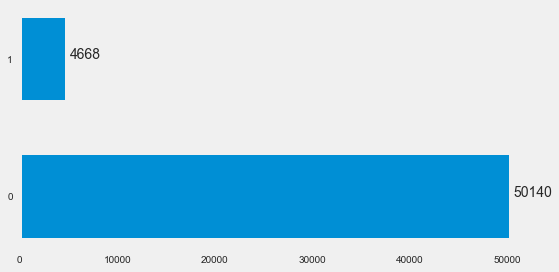

In [93]:
plt.figure(figsize=(8, 4))
x = train_df.is_promoted.value_counts().index
y = train_df.is_promoted.value_counts().values
plt.barh(x, y, height=0.6)
for i, j in zip(x, y):
    plt.text(j+500, i, j, wrap=True)
plt.grid(False)
plt.yticks(x)
plt.tight_layout()

> ## Imbalance problem
Clear case of imbalance dataset as expected. Fewer people get promotion of all employees working in a company every year

In [94]:
# lets check other columns
train_df.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted'],
      dtype='object')

In [95]:
train_df.department.value_counts()

Sales & Marketing    16840
Operations           11348
Technology            7138
Procurement           7138
Analytics             5352
Finance               2536
HR                    2418
Legal                 1039
R&D                    999
Name: department, dtype: int64

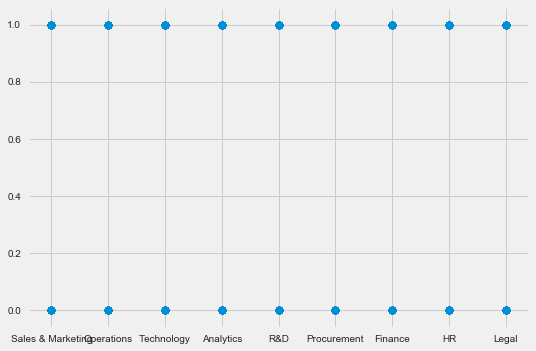

In [97]:
plt.scatter(train_df.department.values, train_df.is_promoted.values)